In [21]:
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Review of Table manipulation ##

Let's see if we can make some interesting conclusions by using what we've learned about tables and visualization!

First, let's set things up: import datascience and numpy, and read in the table called "all-ages".

In [22]:
import numpy as np
from datascience import *
collegedata = Table.read_table("all-ages.csv")
collegedata

Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.0261471,50000,34000,80000
1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.0286361,54000,36000,80000
1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.0302483,63000,40000,98000
1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.0426789,46000,30000,72000
1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.0491884,62000,38500,90000
1105,PLANT SCIENCE AND AGRONOMY,Agriculture & Natural Resources,79409,63043,51077,2070,0.0317909,50000,35000,75000
1106,SOIL SCIENCE,Agriculture & Natural Resources,6586,4926,4042,264,0.0508671,63000,39400,88000
1199,MISCELLANEOUS AGRICULTURE,Agriculture & Natural Resources,8549,6392,5074,261,0.0392304,52000,35000,75000
1301,ENVIRONMENTAL SCIENCE,Biology & Life Science,106106,87602,65238,4736,0.0512898,52000,38000,75000
1302,FORESTRY,Agriculture & Natural Resources,69447,48228,39613,2144,0.0425633,58000,40500,80000


Some of these majors are pretty uncommon/obscure. Let's remove any major with less than 50000 graduates (number of graduates is listed in the Total column). How many rows did we lose? Print this number before displaying the table.

In [5]:
before = collegedata.num_rows
bigmajors = collegedata.where("Total", are.above_or_equal_to(50_000)) #the _ can be used as a , to help breakup large numbers
after = bigmajors.num_rows
print(before - after)
bigmajors

61


Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.0261471,50000,34000,80000
1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.0286361,54000,36000,80000
1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.0426789,46000,30000,72000
1105,PLANT SCIENCE AND AGRONOMY,Agriculture & Natural Resources,79409,63043,51077,2070,0.0317909,50000,35000,75000
1301,ENVIRONMENTAL SCIENCE,Biology & Life Science,106106,87602,65238,4736,0.0512898,52000,38000,75000
1302,FORESTRY,Agriculture & Natural Resources,69447,48228,39613,2144,0.0425633,58000,40500,80000
1303,NATURAL RESOURCES MANAGEMENT,Agriculture & Natural Resources,83188,65937,50595,3789,0.0543413,52000,37100,75000
1401,ARCHITECTURE,Engineering,294692,216770,163020,20394,0.0859911,63000,40400,93500
1501,AREA ETHNIC AND CIVILIZATION STUDIES,Humanities & Liberal Arts,103740,75798,50530,5525,0.067939,46000,32000,71000
1901,COMMUNICATIONS,Communications & Journalism,987676,790696,595739,54390,0.0643603,50000,35000,80000


There are some columns that we aren't too concerned with, so let's get rid of them. Specifically,
 * Major_code means nothing to us
 * Distinction between full time and part time isn't important right now, so let's drop employed_full_time_year_round

In [6]:
dropped = bigmajors.drop("Major_code").drop("employed_full_time_year_round")
dropped

Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.0261471,50000,34000,80000
AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.0286361,54000,36000,80000
ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.0426789,46000,30000,72000
PLANT SCIENCE AND AGRONOMY,Agriculture & Natural Resources,79409,63043,51077,2070,0.0317909,50000,35000,75000
ENVIRONMENTAL SCIENCE,Biology & Life Science,106106,87602,65238,4736,0.0512898,52000,38000,75000
FORESTRY,Agriculture & Natural Resources,69447,48228,39613,2144,0.0425633,58000,40500,80000
NATURAL RESOURCES MANAGEMENT,Agriculture & Natural Resources,83188,65937,50595,3789,0.0543413,52000,37100,75000
ARCHITECTURE,Engineering,294692,216770,163020,20394,0.0859911,63000,40400,93500
AREA ETHNIC AND CIVILIZATION STUDIES,Humanities & Liberal Arts,103740,75798,50530,5525,0.067939,46000,32000,71000
COMMUNICATIONS,Communications & Journalism,987676,790696,595739,54390,0.0643603,50000,35000,80000


I wonder how different majors stack up in terms of employment, relative to other majors in the same category? Let's take a look. 
* Sort first by unemployment rate (low to high), and then by major category.
     * Does it matter what order I sort these in?
     * Can I do this in one line?
* Now show 40 lines so we can see a couple different categories

In [26]:
employsorted = dropped.sort("Unemployment_rate")
categorysorted = dropped.sort("Major_category")
bothsorted = employsorted.sort("Major_category")
bothsorted.show(max_rows=40)

Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.0261471,50000,34000,80000
AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.0286361,54000,36000,80000
PLANT SCIENCE AND AGRONOMY,Agriculture & Natural Resources,79409,63043,51077,2070,0.0317909,50000,35000,75000
FORESTRY,Agriculture & Natural Resources,69447,48228,39613,2144,0.0425633,58000,40500,80000
ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.0426789,46000,30000,72000
NATURAL RESOURCES MANAGEMENT,Agriculture & Natural Resources,83188,65937,50595,3789,0.0543413,52000,37100,75000
MUSIC,Arts,276262,192704,116142,11155,0.0547192,45000,30000,67000
FINE ARTS,Arts,571961,386961,256747,29912,0.0717533,45000,30000,70000
COMMERCIAL ART AND GRAPHIC DESIGN,Arts,504657,379980,266671,30330,0.0739197,46600,32000,70000
DRAMA AND THEATER ARTS,Arts,174817,135071,81519,11789,0.0802737,42000,29000,62000


What's the business major with the lowest unemployment rate?
It's a little hard to see patterns with just a table like this, so let's use a bar chart to see patterns within certain categories. Use barh to plot unemployement rates of business majors.
* Make a new table called business containing just business majors (try using take for this: the rows with business majors are 18-29, inclusive on both ends)
    * Challenge: how would I figure out what these rows are? (look up np.where())
* Plot unemployment rate for each major in the business category.

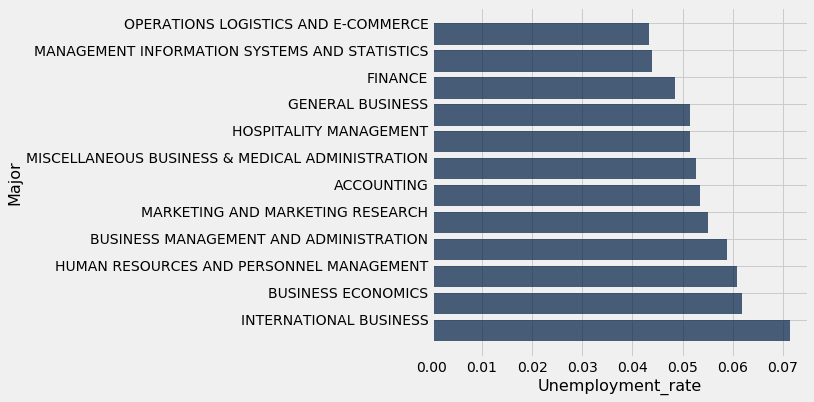

In [32]:
business = bothsorted.where("Major_category", "Business")
business.barh("Major","Unemployment_rate")

It's good to think about what we can use visualization for. Here's an example of something that might not be terribly insightful: plot the employement rate vs unemployment rate for all majors. Use the scatter function. 

First, create and add a new column called employment rate to bothsorted. (This is employed/(unemployed + employed)). Assign this new table to the same name as before, bothsorted. Then, use the second cell to plot. 

In [38]:
bothsorted = bothsorted.with_column("Employment_rate", bothsorted.column("Employed") / (bothsorted.column("Employed") + bothsorted.column("Unemployed")))

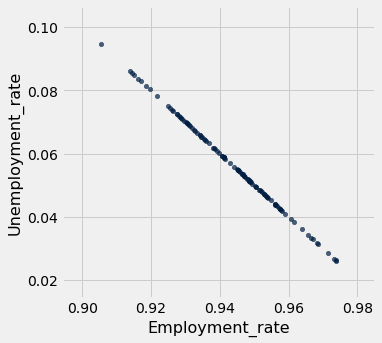

In [45]:
bothsorted.scatter("Employment_rate","Unemployment_rate")

Here's something that might be a little more useful; is there a relationship between unemployment rate and median income? Plot the two and find out.

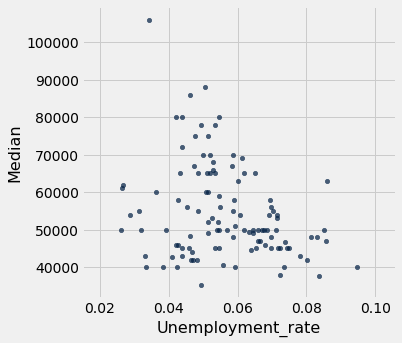

In [44]:
bothsorted.scatter("Unemployment_rate", "Median")

You'll learn how to quantify the difference between these two scatter plots as the course progresses.

Bonus set of questions as time allows:
You may add code cells as necessary.

Now, let's take a look at the majors we ignored earlier, and see what they look like. 

* Create a table called smallmajors with every major that wasn't included in the bigmajors. 
* Drop the columns we did before
* Make a bar chart comparing the differences in Median income of a major group of your choice. 
* Compare differences between P25 and P75 of every major (from the original all majors table). Should you use a bar graph, scatter plot, or histogram? Do that.
